#### Youtube Web Scrapper

#### Flask Webscrapper Github - https://github.com/baljeetjangra/web-scrapping-app

#### AWS Deployment Link -http://flaskwebappdev-env.eba-7qkxhzfa.us-east-1.elasticbeanstalk.com/

#### Functionality

In [49]:
from bs4 import BeautifulSoup as bs
import requests
from urllib.request import urlopen as uReq
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
import re
import pandas as pd

In [40]:
chrome_service = ChromeService(executable_path=ChromeDriverManager().install())
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
driver = webdriver.Chrome(service=chrome_service, options=chrome_options)

In [41]:
youtube_url = "https://www.youtube.com/@PW-Foundation/videos"
driver.get(youtube_url)
driver.implicitly_wait(10)
youtube_source = driver.page_source
youtube_html = bs(youtube_source, "html.parser")
#driver.close()

#### Q1. Write a python program to extract the video URL of the first five videos.

In [42]:
## extract video urls
youtube_a_tags = youtube_html.find_all('a',class_="ytd-thumbnail")
youtube_a_tags = youtube_a_tags[1:6]
youtube_extract_urls = []
for i in youtube_a_tags:
    youtube_extract_urls.append("https://www.youtube.com/"+i.get('href'))
    print("https://www.youtube.com/"+i.get('href'))

https://www.youtube.com//watch?v=nX5ONgCdLcc
https://www.youtube.com//watch?v=AM2Dt7cNebw
https://www.youtube.com//watch?v=7nMJVhey9TM
https://www.youtube.com//watch?v=FSVVlcFUCMk
https://www.youtube.com//watch?v=vKxdTuOirnI


#### Q2. Write a python program to extract the URL of the video thumbnails of the first five videos.

In [43]:
## extract thumbnail url

In [44]:
youtube_extract_thumbnails = []
for i in youtube_extract_urls:
    driver.get(i)
    video_page_source = bs(driver.page_source,"html.parser")
    find = video_page_source.find('link',itemprop="thumbnailUrl")
    youtube_extract_thumbnails.append(find['href'])
for thumbnail in youtube_extract_thumbnails:
    print(thumbnail)

https://i.ytimg.com/vi/nX5ONgCdLcc/maxresdefault.jpg
https://i.ytimg.com/vi/AM2Dt7cNebw/maxresdefault.jpg
https://i.ytimg.com/vi/7nMJVhey9TM/maxresdefault.jpg
https://i.ytimg.com/vi/FSVVlcFUCMk/maxresdefault.jpg
https://i.ytimg.com/vi/vKxdTuOirnI/maxresdefault.jpg


#### Q3. Write a python program to extract the title of the first five videos.

In [45]:
###extract video title
youtube_extract_titles=[]
youtube_heading_tags = youtube_html.find_all('h3',class_="style-scope ytd-rich-grid-media")
youtube_heading_tags = youtube_heading_tags[:5]
for i in youtube_heading_tags:
    youtube_extract_titles.append(i.text)
    print(i.text)

How to Attempt English Board Exam ????
Best technique to attempt SST paper in Board exam || Class 10th
Last Minute Strategy To Score More Than 98% || ICSE Boards || Class-10th
Why You Should Choose Commerce After 10th? || Complete Information💯
Follow This Plan To Score More Than 95% in Boards || Topper's Strategy


#### Q4. Write a python program to extract the number of views of the first five videos.

In [46]:
#no of views
youtube_extract_views=[]
youtube_span_tags = youtube_html.find_all('span',class_="inline-metadata-item style-scope ytd-video-meta-block")
views_pattern = re.compile("\d+.*views")

views_spans = []
for span in youtube_span_tags:
    if views_pattern.search(span.text):
        views_spans.append(span)
        
views_spans = views_spans[:5]
for span in views_spans:
    youtube_extract_views.append(span.text)
    print(span.text)

122K views
54K views
22K views
28K views
313K views


#### Q5. Write a python program to extract the time of posting of video for the first five videos.

In [47]:
# time of upload
views_pattern = re.compile("\d+.*ago")
youtube_extract_upload_time=[]
views_spans = []
for span in youtube_span_tags:
    if views_pattern.search(span.text):
        views_spans.append(span)
        
        
# views_spans = [span for span in youtube_span_tags if views_pattern.search(span.text)]
views_spans = views_spans[:5]
for span in views_spans:
    youtube_extract_upload_time.append(span.text)
    print(span.text)
    
driver.close()

1 day ago
2 days ago
3 days ago
4 days ago
9 days ago


#### Save the data to the CSV file

In [50]:
data = { 'Youtube Urls': youtube_extract_urls,
                        'Thumbnails':youtube_extract_thumbnails,
                        'Titles':youtube_extract_titles,
                        'Views': youtube_extract_views,
                        'Upload Time':youtube_extract_upload_time
                    }
df = pd.DataFrame(data)

df.to_csv('data.csv', index=False)

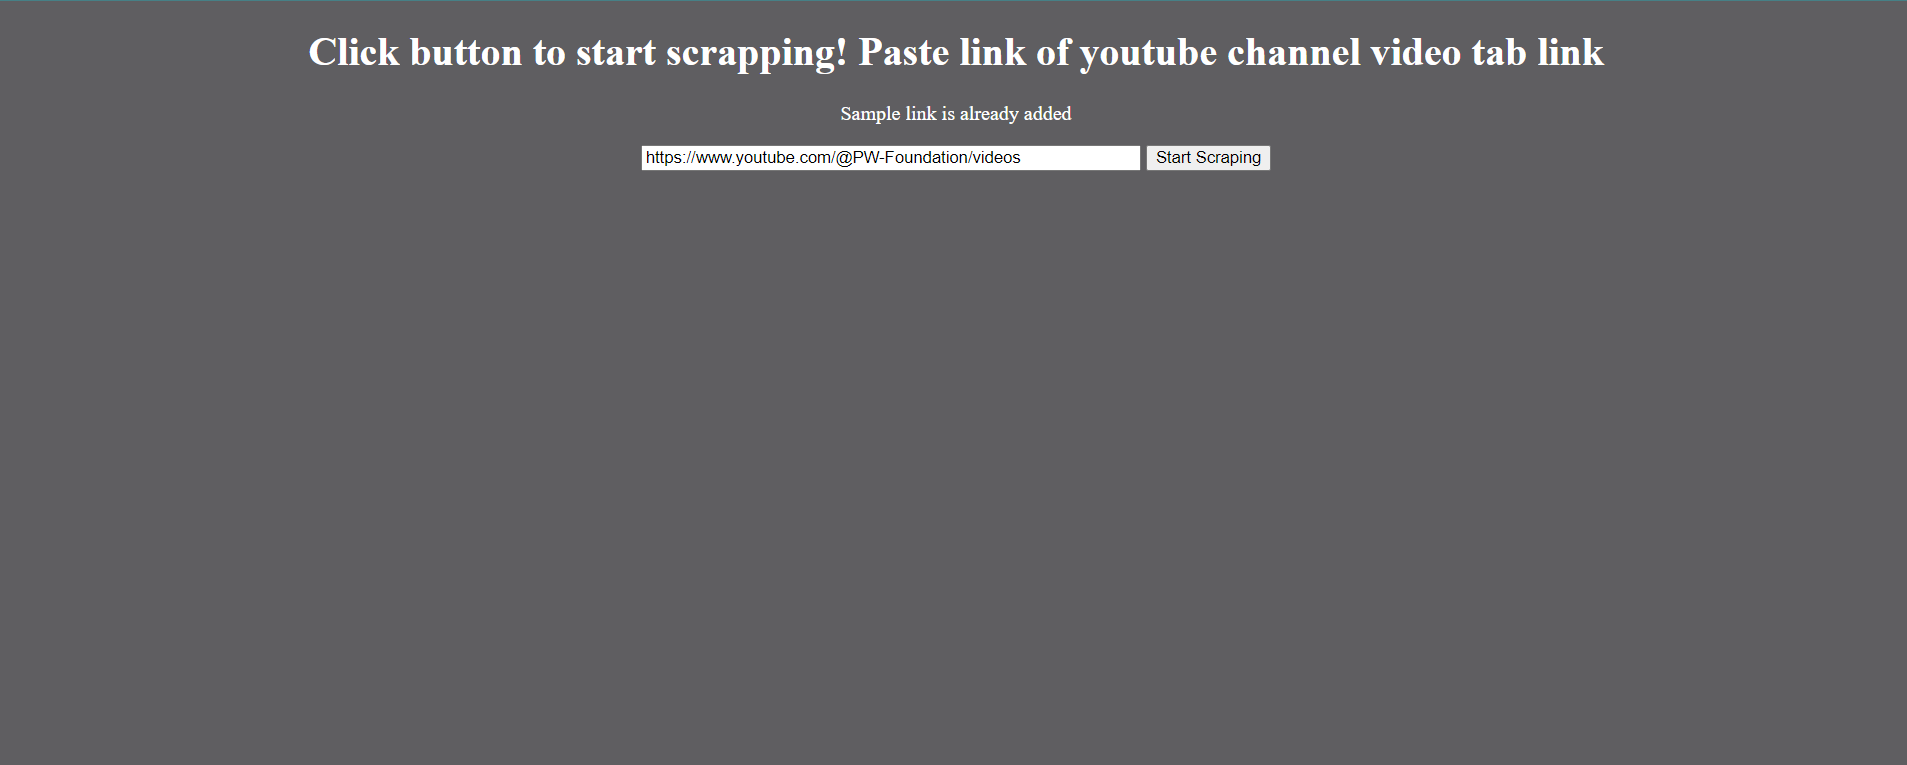

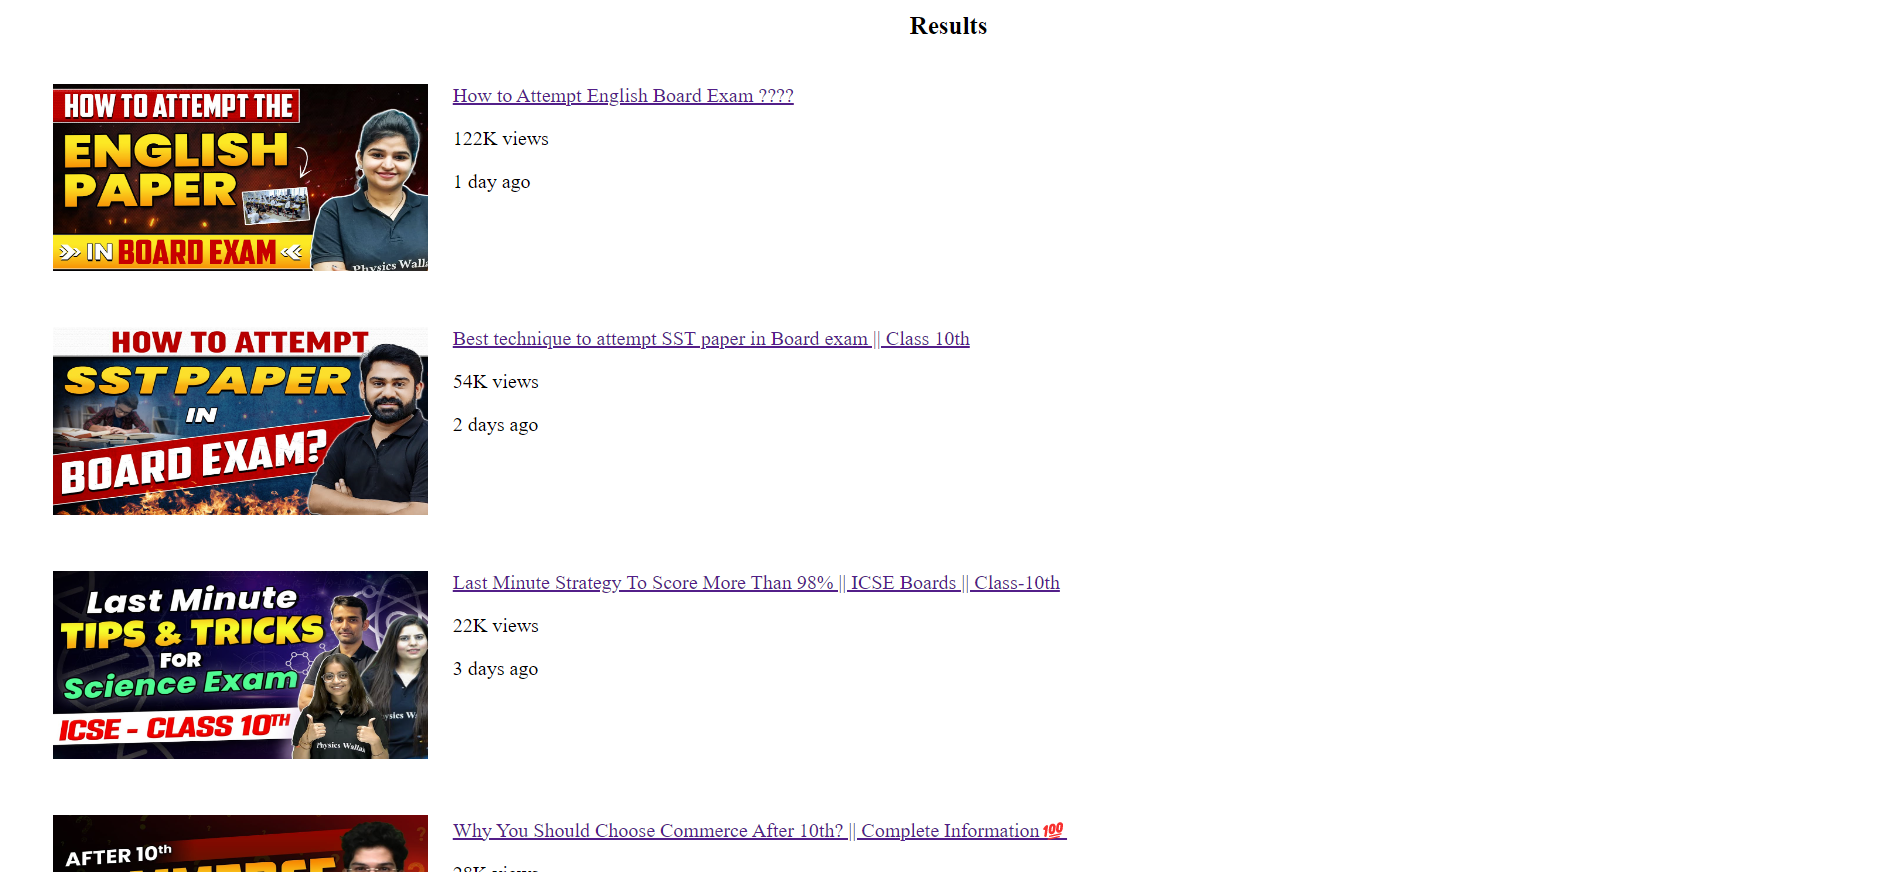

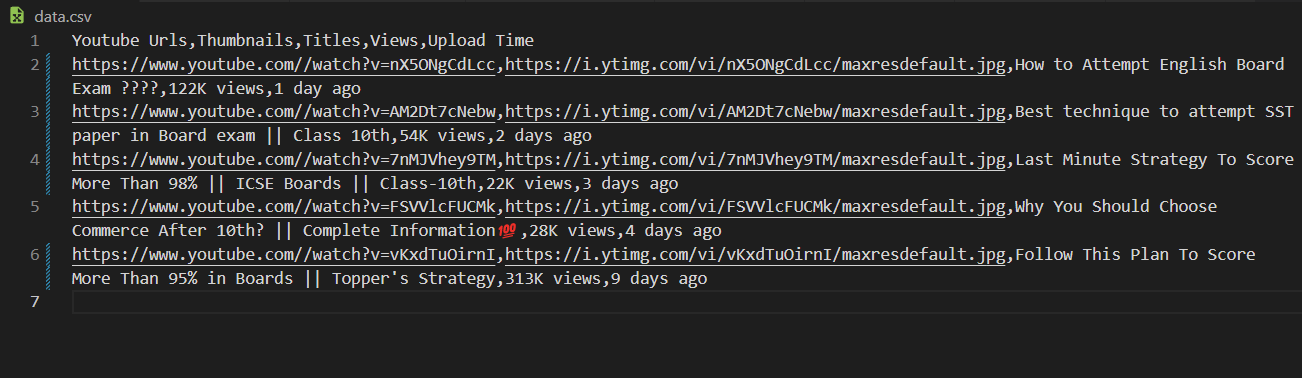